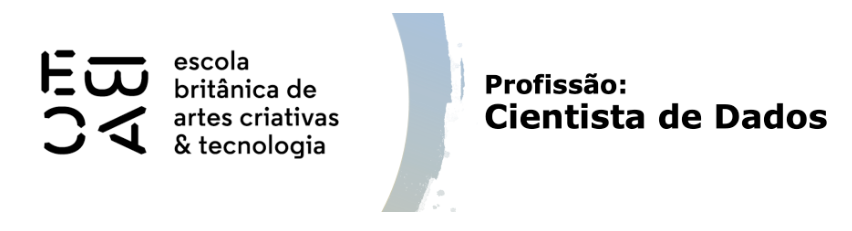

# Módulo 18 | Regressão Logística I | Exercício 2
Aluna: Wilma Darc Alves de Farias

Data:11 de dezembro de 2025.

# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from scipy.stats import ks_2samp 
import statsmodels.formula.api as smf

In [21]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
print(df.info())
print('Quantidade de linhas duplicadas:', df.duplicated().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB
None
Quantidade de linhas duplicadas: 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [6]:
def bivariada_qualitativa(dataframe:pd.DataFrame, x:str, y:str) -> pd.DataFrame:
    
    tabela_cruzada = pd.crosstab(index=dataframe[x], 
                                 columns=dataframe[y], 
                                 margins=True, 
                                 margins_name='total')
    
    tabela_cruzada['prob'] = tabela_cruzada[1] / tabela_cruzada['total']
    
    tabela_cruzada['odds'] = tabela_cruzada[1] / tabela_cruzada[0]
    tabela_cruzada['odds_ratio'] = tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds']

    tabela_cruzada['logito'] = np.log(tabela_cruzada['odds'])
    tabela_cruzada['WOE'] = np.log(tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds'])
    
    return tabela_cruzada

In [7]:
bivariada_qualitativa(dataframe=df, x='sex', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


    p: tipo de dor no peito

    1.angina típica
    2.angina atípica
    3.dor não-angina
    4.assintomático

In [8]:
bivariada_qualitativa(dataframe=df, x='cp', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [9]:
bivariada_qualitativa(dataframe=df, x='exang', y='flag_doente')

flag_doente,0,1,total,prob,odds,odds_ratio,logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


# Qual delas parece discriminar mais o risco?

    Entre as três variáveis, a que mais parece discriminar o risco é exang (dor no peito causada por exercício), pois em relação as demais variáveis, é a que difere com maior valor de probabilidade entre os perfis, dando indício de relevância significativa para um modelo de classificação.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [15]:
def bivariada_quantitativa(dataframe: pd.DataFrame, x: str, y: str, q: int = 5) -> pd.DataFrame:
    # Criar os intervalos
    intervalos = pd.qcut(dataframe[x], q)

    # Criar a tabela cruzada
    tabela_cruzada = pd.crosstab(index=intervalos,
                                 columns=dataframe[y],
                                 margins=True,
                                 margins_name='total')

    # Calcular métricas
    tabela_cruzada['prob'] = tabela_cruzada[1] / tabela_cruzada['total']
    tabela_cruzada['odds'] = tabela_cruzada[1] / tabela_cruzada[0]
    tabela_cruzada['odds_ratio'] = tabela_cruzada['odds'] / tabela_cruzada.loc['total', 'odds']
    tabela_cruzada['logito'] = np.log(tabela_cruzada['odds'])
    tabela_cruzada['logito_ratio'] = np.log(tabela_cruzada['odds_ratio'])

    # Calcular média da variável quantitativa por faixa
    medias = dataframe.groupby(intervalos)[x].mean()
    tabela_cruzada['media_quantitativa'] = medias
    tabela_cruzada.loc['total', 'media_quantitativa'] = dataframe[x].mean()
    tabela_cruzada['media_quantitativa'] = round(tabela_cruzada['media_quantitativa'])

    # Ajustar nome do índice
    tabela_cruzada.index.name = x

    return tabela_cruzada

In [16]:
resultado = bivariada_quantitativa(dataframe=df, x='age', y='flag_doente')
print(resultado)

flag_doente       0    1  total      prob      odds  odds_ratio    logito  \
age                                                                         
(28.999, 45.0]   47   16     63  0.253968  0.340426    0.401653 -1.077559   
(45.0, 53.0]     42   22     64  0.343750  0.523810    0.618020 -0.646627   
(53.0, 58.0]     32   39     71  0.549296  1.218750    1.437950  0.197826   
(58.0, 62.0]     13   32     45  0.711111  2.461538    2.904261  0.900787   
(62.0, 77.0]     30   30     60  0.500000  1.000000    1.179856  0.000000   
total           164  139    303  0.458746  0.847561    1.000000 -0.165392   

flag_doente     logito_ratio  media_quantitativa  
age                                               
(28.999, 45.0]     -0.912166                41.0  
(45.0, 53.0]       -0.481235                50.0  
(53.0, 58.0]        0.363218                56.0  
(58.0, 62.0]        1.066179                60.0  
(62.0, 77.0]        0.165392                67.0  
total               0.0000

C:\Users\wilma\AppData\Local\Temp\ipykernel_16448\387925849.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = dataframe.groupby(intervalos)[x].mean()


In [18]:
df

flag_doente,0,1,total,prob,odds,odds_ratio,logito,logito_ratio,media_quantitativa
age,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.0
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.0
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.0
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.0
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,67.0
total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.0


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [29]:
# Remover valores nulos
df_limpo = df.dropna(subset=['flag_doente', 'sex', 'cp', 'trestbps', 'age'])

# Normalizar variável contínua
df_limpo['age_norm'] = (df_limpo['age'] - df_limpo['age'].mean()) / df_limpo['age'].std()

# Categorizar trestbps se necessário (ex: em faixas)
df_limpo['trestbps_cat'] = pd.qcut(df_limpo['trestbps'], q=4)

# Fórmula ajustada
formula = 'flag_doente ~ C(sex) + C(cp) + C(trestbps_cat) + age_norm'

# Preparar os dados
y, X = patsy.dmatrices(formula, data=df_limpo, return_type='dataframe')

# Ajustar o modelo com mais iterações e método robusto
modelo = sm.Logit(y, X).fit(method='bfgs', maxiter=100)

# Exibir resultados
print(modelo.summary())

# Odds ratios
print("\nOdds Ratios:")
print(np.exp(modelo.params))

Optimization terminated successfully.
         Current function value: 0.478951
         Iterations: 51
         Function evaluations: 52
         Gradient evaluations: 52
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.3056
Time:                        21:03:08   Log-Likelihood:                -145.12
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 8.324e-24
                                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

   Interprete os parâmetros                                                                                                                          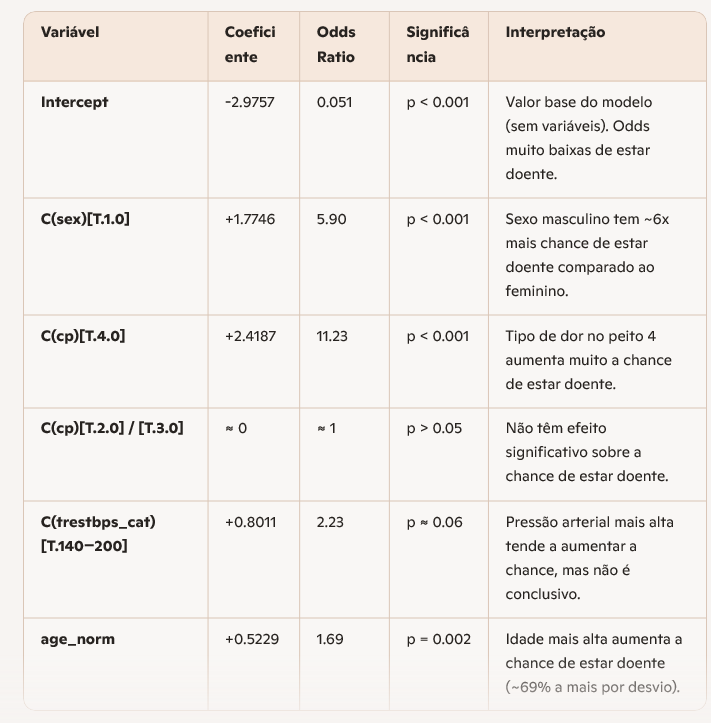

# 📌 Conclusões
    • 	Sexo masculino e dor no peito tipo 4 são os fatores mais fortemente associados à doença.
    • 	Idade também tem efeito significativo: quanto mais velha a pessoa, maior a chance.
    • 	Pressão arterial elevada mostra tendência, mas não é estatisticamente garantida.
    • 	Algumas categorias de  não têm efeito relevante.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

C:\Users\wilma\AppData\Local\Temp\ipykernel_16448\2878853621.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_predita = df_limpo.groupby('grupo_prob')['prob_predita'].mean()
C:\Users\wilma\AppData\Local\Temp\ipykernel_16448\2878853621.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_observada = df_limpo.groupby('grupo_prob')['flag_doente'].mean()


grupo_prob
(0.0132, 0.139]    0.072102
(0.139, 0.3]       0.212888
(0.3, 0.581]       0.432516
(0.581, 0.816]     0.701319
(0.816, 0.949]     0.874837
Name: prob_predita, dtype: float64
grupo_prob
(0.0132, 0.139]    0.065574
(0.139, 0.3]       0.166667
(0.3, 0.581]       0.491803
(0.581, 0.816]     0.733333
(0.816, 0.949]     0.836066
Name: flag_doente, dtype: float64


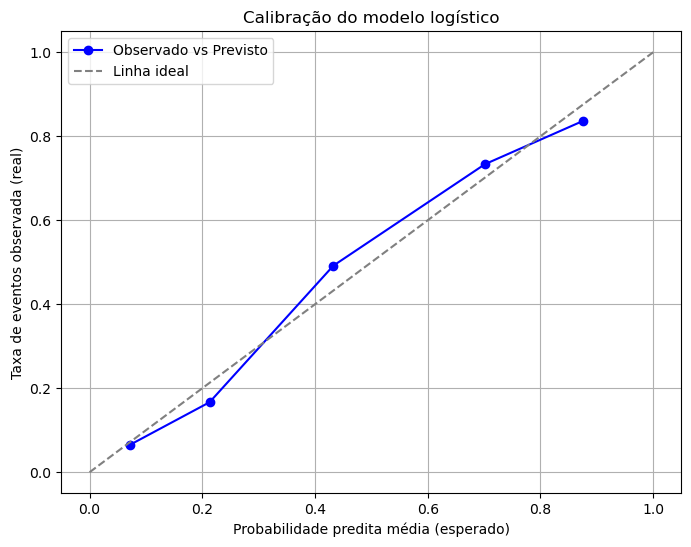

In [42]:
# 1. Calcular a probabilidade predita pelo modelo
df_limpo['prob_predita'] = modelo.predict(X)

# 2. Categorizar em G=5 grupos (quintis)
df_limpo['grupo_prob'] = pd.qcut(df_limpo['prob_predita'], q=5)

# 3. Calcular a média da probabilidade predita por grupo
media_predita = df_limpo.groupby('grupo_prob')['prob_predita'].mean()
print(media_predita)

# 4. Calcular a taxa de eventos observada por grupo
taxa_observada = df_limpo.groupby('grupo_prob')['flag_doente'].mean()
print(taxa_observada)

# 5. Comparar graficamente
plt.figure(figsize=(8,6))
plt.plot(media_predita, taxa_observada, marker='o', linestyle='-', color='blue', label='Observado vs Previsto')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Linha ideal')
plt.xlabel('Probabilidade predita média (esperado)')
plt.ylabel('Taxa de eventos observada (real)')
plt.title('Calibração do modelo logístico')
plt.legend()
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Acurácia
# Previsão binária com threshold de 0.5
df_limpo['classe_prevista'] = (df_limpo['prob_predita'] >= 0.5).astype(int)
acuracia = accuracy_score(df_limpo['flag_doente'], df_limpo['classe_prevista'])
print(f"Acurácia do modelo: {round(acuracia, 4)}")

# 2. GINI = 2 * AUC - 1
auc = roc_auc_score(df_limpo['flag_doente'], df_limpo['prob_predita'])
gini = 2 * auc - 1
print(f"Índice GINI: {round(gini, 4)}")

# 3. KS (Kolmogorov-Smirnov)
fpr, tpr, thresholds = roc_curve(df_limpo['flag_doente'], df_limpo['prob_predita'])
ks = max(tpr - fpr)
print(f"Estatística KS: {round(ks, 4)}")

Acurácia do modelo: 0.7789
Índice GINI: 0.7014
Estatística KS: 0.5812


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [45]:
reglog = smf.logit(formula='''flag_doente 
                            ~ age
                            + sex 
                            + C(cp, Treatment(reference=4))
                            + thalach
                            + exang
                            + oldpeak
                            ''', 
                   data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.414266
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                  0.3994
Time:                        21:32:30   Log-Likelihood:                -125.52
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 5.652e-32
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -0.6474      2.025     -0.320      0.749      -4.617       3.322
C(cp, Treatment(reference=4))[T.1.0]    -2.1539      0.594     -3.625      0.000      -3.319      -0.989
C(cp, Treatment(reference=4))[T.2.0]    -1.4851      0.485     -3.065      0.002      -2.435      -0.535
C(cp, Treatment(reference=4))[T.3.0]    -1.9797      0.405     -4.893      0.000      -2.773      -1.187
age                                      0.0394      0.020      1.984      0.047       0.000       0.078
sex                                      1.6929      0.379      4.463      0.000       0.949       2.436
thalach                                 -0.0192      0.009     -2.207      0.027      -0.036      -0.002
exang                                    0.8612      0.366      2.354      0.019       0.144       1.578
oldpeak                                  0.6968      0.170      4.108      0.000       0.364       1.029
========================================================================================================
"""

In [54]:
# 1. Previsão das probabilidades
df['predito'] = reglog.predict(exog=df)

# 2. Categorizando a probabilidade em 5 grupos
pred_cat = pd.qcut(df['predito'], q=5)
group_reg = df.groupby(pred_cat)

# 3. Criando tabela de qualidade por grupo
qualid = group_reg[['flag_doente']].count().rename(columns={'flag_doente': 'contagem'})
qualid['predito'] = group_reg['predito'].mean()
qualid['pct_doente'] = group_reg['flag_doente'].mean()

# 4. Acurácia
df['classe_prevista'] = (df['predito'] >= 0.5).astype(int)
acc = accuracy_score(df['flag_doente'], df['classe_prevista'])
print(f'Acurácia: {acc * 100:.2f}%')

# 5. AUC e GINI
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['predito'])
auc_ = roc_auc_score(df['flag_doente'], df['predito'])
gini = 2 * auc_ - 1
print(f'GINI: {gini * 100:.2f}%')

# 6. KS
print(f'KS: {ks * 100:.2f}%')

Acurácia: 82.84%
GINI: 78.04%
KS: 58.12%


C:\Users\wilma\AppData\Local\Temp\ipykernel_16448\655903805.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(pred_cat)


	Para melhorar o modelo de regressão logística, foram incluídas variáveis adicionais com potencial preditivo, como thalach, exang e oldpeak, além das já utilizadas age, sex e cp. O novo modelo apresentou desempenho superior, com acurácia de 82.84%, índice GINI de 78.04% e estatística KS de 58.12%, indicando excelente capacidade de discriminação entre indivíduos doentes e não-doentes.
    
    A calibração também foi avaliada por meio da comparação entre probabilidades previstas e taxas observadas por grupo, mostrando boa coerência entre previsão e realidade. Conclui-se que o modelo ajustado é robusto, bem calibrado e altamente discriminativo, sendo adequado para aplicações preditivas na área da saúde.
